<a href="https://colab.research.google.com/github/nv-bel/unsupervised-learning-shopping/blob/main/unsupervised-learning-clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

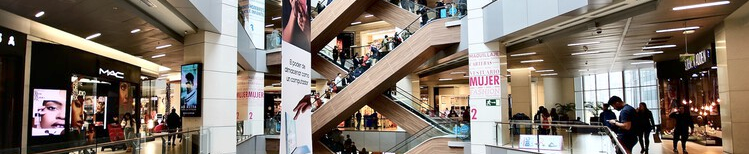

#Unsupervised Learning

O proprietário de um shopping de supermercado possui alguns dados básicos sobre seus clientes, como ID do cliente, idade, gênero, renda anual, pontuação de gastos e tamanho total da família (incluindo o cliente). A pontuação de Gastos (spending_score) é algo que foi atribuido ao cliente com base em parâmetros definidos, como comportamento do cliente e dados de compra.

## Estudo do Problema

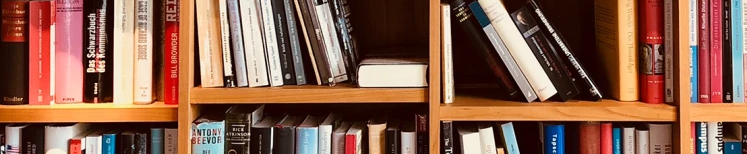

Como pesquisador, você recebeu uma solicitação do proprietário de um shopping center. Ele deseja entender melhor seus clientes-alvo, identificando aqueles que são mais propensos a aumentar suas compras. Esse conhecimento será fundamental para direcionar a estratégia de marketing de forma mais eficaz.

## Problemas para resolver



Ao final deste estudo de caso, você deve responder:

1. [20%] Dados em formato gráfico (bar plots, etc.), que podem complementar a sua análise sobre os clientes, exemplos:
 - Distribuição das pessoas por gênero
 - Distribuição das pessoas por intervalo de idade
 - Distribuição das pessoas por fonte de renda
 - Outros gráficos relevantes, justifique a sua função

2. [20%] Baseado na imagem anexada abaixo (Anexo 1), crie uma nova coluna categórica no dataset contendo como possíveis valores: "Lower-income", "Middle-income" e "Upper-income". Nota máxima se a solução for correta e vetorizada

3. [40%] Segmentação de clientes usando algoritmo de aprendizado de máquina não supervisionado. Segmente os clientes em "grupos" e justifique sua decisão em relação ao método de segmentação escolhido, colunas utilizadas na análise e o número de grupos formados.
 - Para esta análise ignore a coluna FamilyCount e qualquer coluna calculada a partir dela
 - Faça o melhor possível para justificar a escolha des hiperparâmetros do método não-supervisionado escolhido

4. [20%] Quem são seus clientes-alvo com quem você pode começar uma estratégia de marketing [facilidade de conversão]. Não existe apenas uma resposta correta, justifique sua resposta.
 - Para esta análise ignore a coluna FamilyCount e qualquer coluna calculada a partir dela

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Updated_Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Family Count            200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [ ]:
# Análise preliminar
df.describe()

# Sem valores nulos
# Dados coerentes de acordo c suas colunas.
# Não parece ter outliers

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Family Count
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.480000
std,57.879185,13.969007,26.264721,25.823522,0.500854
min,1.000000,18.000000,15.000000,1.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,2.000000
max,200.000000,70.000000,137.000000,99.000000,2.000000


-----
### Questão 1

Resposta texto

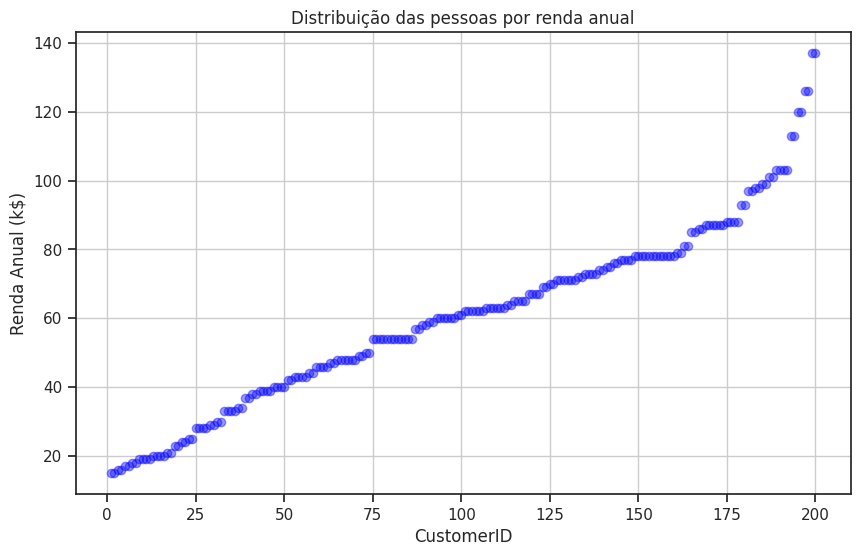

In [ ]:
# Distribuição das pessoas por fonte de renda (media anual) - Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['CustomerID'], df['Annual Income (k$)'], color='blue', alpha=0.4)
plt.title('Distribuição das pessoas por renda anual')
plt.xlabel('CustomerID') #Por individuo
plt.ylabel('Renda Anual (k$)')
plt.grid(True)
plt.show()



<Figure size 640x480 with 0 Axes>

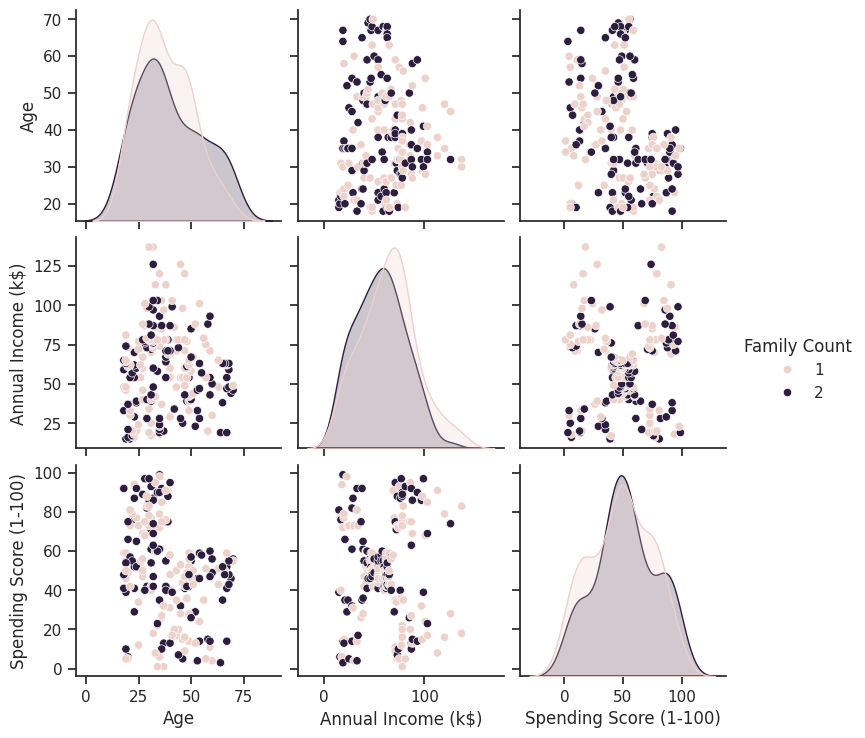

In [ ]:
sns.set_theme(style="ticks")
plt.suptitle('Customers')
sns.pairplot(df.drop(['CustomerID'], axis=1), hue='Family Count')

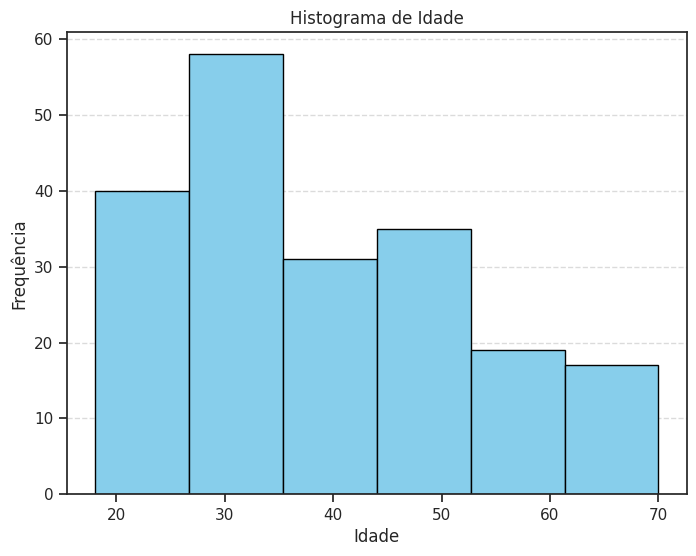

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=6, edgecolor='black', color='skyblue')
plt.title('Histograma de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

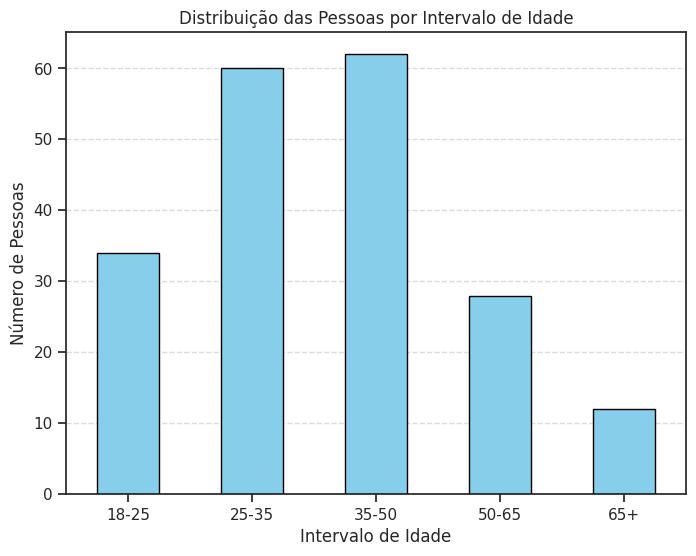

In [ ]:
bins = [18, 25, 35, 50, 65, np.inf]
names = ['18-25','25-35', '35-50', '50-65', '65+']

df['AgeRange'] = pd.cut(df['Age'], bins, labels=names)

# Contando o número de pessoas em cada intervalo de idade
age_distribution = df['AgeRange'].value_counts().sort_index()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
age_distribution.plot(kind='bar', color='skyblue',edgecolor= 'black')
plt.title('Distribuição das Pessoas por Intervalo de Idade')
plt.xlabel('Intervalo de Idade')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

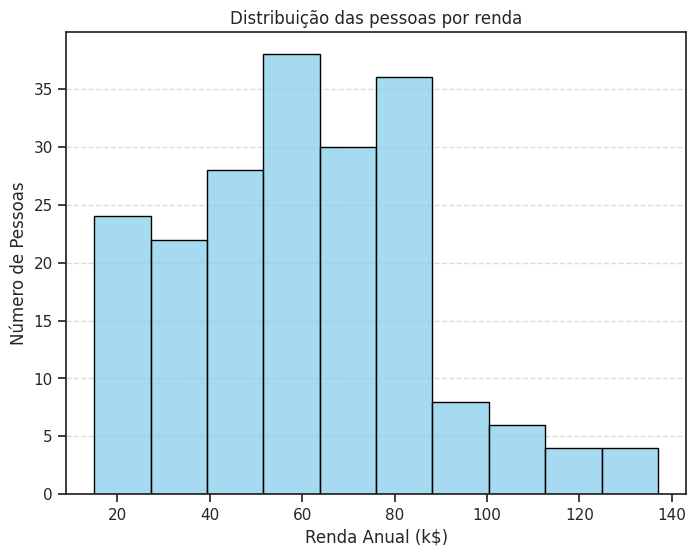

In [ ]:
sns.set_theme(style="ticks")

# Plotando histograma da renda anual
plt.figure(figsize=(8, 6))
sns.histplot(df['Annual Income (k$)'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribuição das pessoas por renda')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Número de Pessoas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

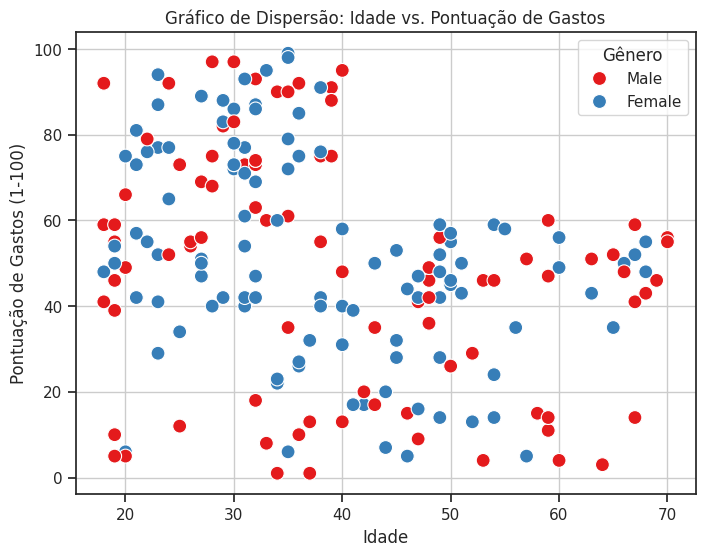

In [ ]:
# Gráfico de dispersão entre idade e pontuação de gastos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Gender', palette='Set1', s=100)
plt.title('Gráfico de Dispersão: Idade vs. Pontuação de Gastos')
plt.xlabel('Idade')
plt.ylabel('Pontuação de Gastos (1-100)')
plt.legend(title='Gênero')
plt.grid(True)
plt.show()
#valores variados, aparentemente não teve nada tao marcante.

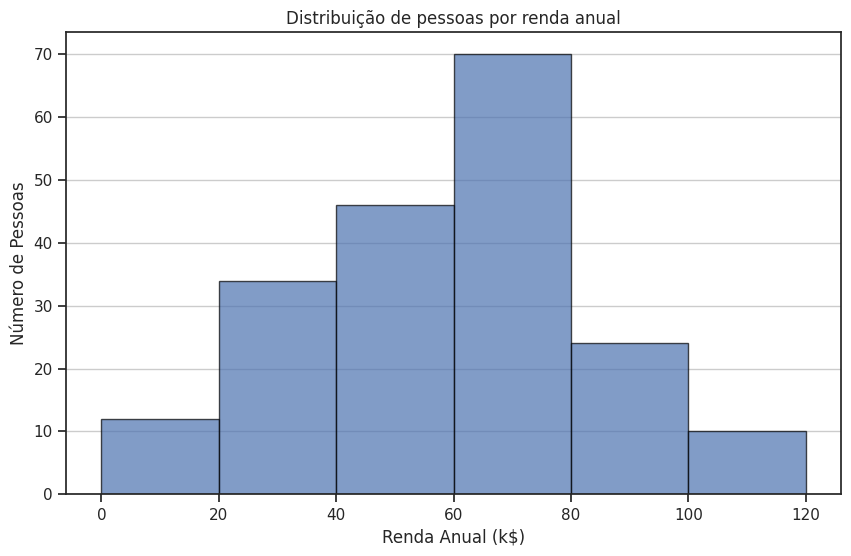

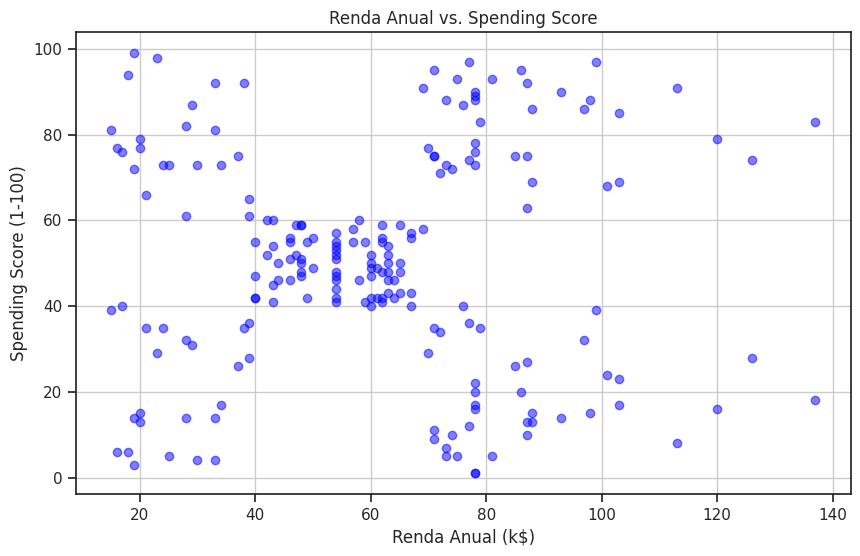

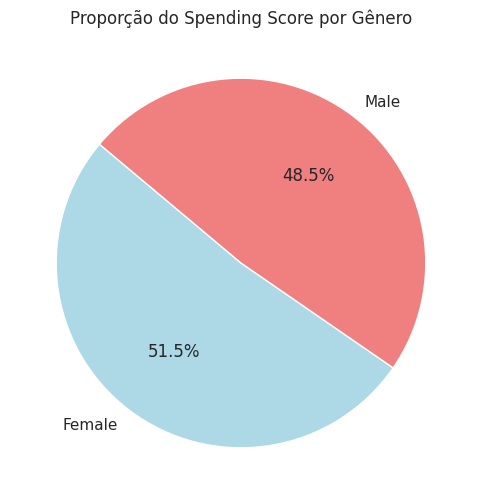

In [ ]:
# Outros gráficos relevantes

# Distribuição das pessoas por fonte de renda (media anual)
bins = range(0, 140, 20)  # Intervalos de 20k

plt.figure(figsize=(10, 6))
plt.hist(df['Annual Income (k$)'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribuição de pessoas por renda anual')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Número de Pessoas')
plt.xticks(bins)
plt.grid(axis='y')
plt.show()

# ----------- Annual Income x Spending Score ----------- #
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='blue', alpha=0.5)
plt.title('Renda Anual vs. Spending Score')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()
# Não necessariamente, quem ganha mais gasta mais.

# ----------- Proporção de gasto por gênero ----------- #
mean_spending_score = df.groupby('Gender')['Spending Score (1-100)'].mean()

#gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(mean_spending_score, labels=mean_spending_score.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Proporção do Spending Score por Gênero')
plt.show()
# Valores quase iguais



In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Family Count,AgeRange
0,1,Male,19,15,39,2,18-25
1,2,Male,21,15,81,2,18-25
2,3,Female,20,16,6,2,18-25
3,4,Female,23,16,77,1,18-25
4,5,Female,31,17,40,1,25-35
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,25-35
196,197,Female,45,126,28,1,35-50
197,198,Male,32,126,74,2,25-35
198,199,Male,32,137,18,1,25-35


-----
### Questão 2.

Resposta texto

In [ ]:
#  Baseado na imagem anexada abaixo (Anexo 1), crie uma nova coluna categórica no dataset contendo como possíveis valores:
# "Lower-income", "Middle-income" e "Upper-income". Nota máxima se a solução for correta e vetorizada
bins_1_person = [0, 34.400, 103.200, np.inf]
labels_1_person = ['Lower-income', 'Middle-income', 'Upper-income']

# Definindo os intervalos e labels para 2 pessoas na família
bins_2_person = [0, 43.693, 131.078, np.inf]
labels_2_person = ['Lower-income', 'Middle-income', 'Upper-income']

df.loc[df['Family Count'] == 1, 'Income Class'] = pd.cut(
    df.loc[df['Family Count'] == 1, 'Annual Income (k$)'],
    bins=bins_1_person,
    labels=labels_1_person
)

df.loc[df['Family Count'] == 2, 'Income Class'] = pd.cut(
    df.loc[df['Family Count'] == 2, 'Annual Income (k$)'],
    bins=bins_2_person,
    labels=labels_2_person
)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Family Count,AgeRange,Income Class
0,1,Male,19,15,39,2,18-25,Lower-income
1,2,Male,21,15,81,2,18-25,Lower-income
2,3,Female,20,16,6,2,18-25,Lower-income
3,4,Female,23,16,77,1,18-25,Lower-income
4,5,Female,31,17,40,1,25-35,Lower-income
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,25-35,Upper-income
196,197,Female,45,126,28,1,35-50,Upper-income
197,198,Male,32,126,74,2,25-35,Middle-income
198,199,Male,32,137,18,1,25-35,Upper-income


-----
### Questão 3

Segmentação de clientes usando algoritmo de aprendizado de máquina não supervisionado. Segmente os clientes em "grupos" e justifique sua decisão em relação ao método de segmentação escolhido, colunas utilizadas na análise e o número de grupos formados.

Para esta análise ignore a coluna FamilyCount e qualquer coluna calculada a partir dela.
Faça o melhor possível para justificar a escolha des hiperparâmetros do método não-supervisionado escolhido

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

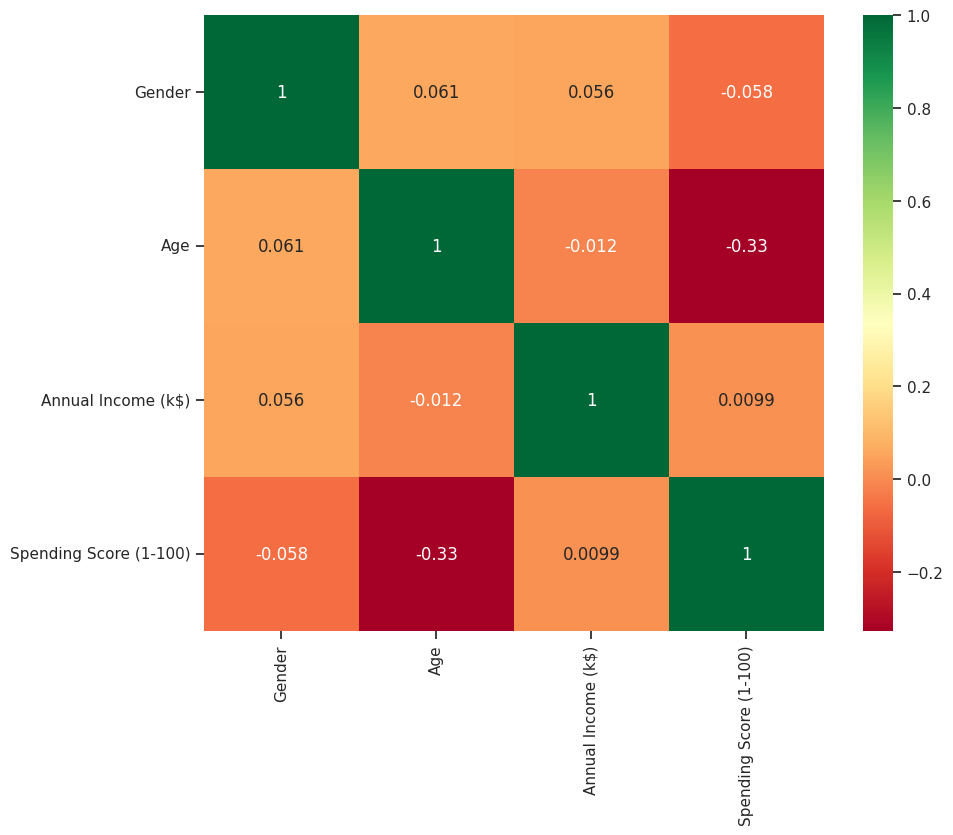

In [ ]:
df.drop(['CustomerID', 'Family Count', 'AgeRange', 'Income Class'], axis=1, inplace=True) #drop nas colunas irrelevantes

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# num geral, variaveis com fracas relacoes
# -0.33: parece que as pessoas mais novas tem um score de gasto maior do que as mais velhas
# parece que genero e renda anual tem quase nenhuma relacao com as outras variaveis

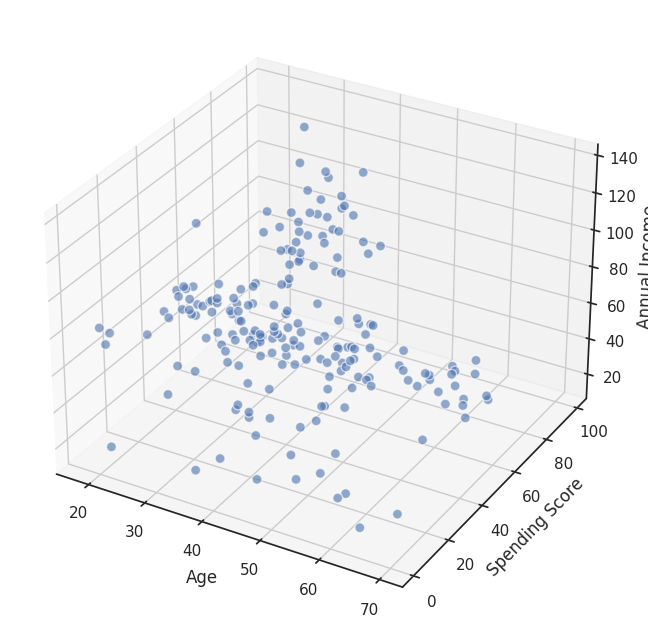

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Age']
ys = df['Spending Score (1-100)']
zs = df['Annual Income (k$)']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')

plt.show()

# spending Score mais alto entre as idade de 25 a 40 anos
# mulheres, em geral, gastam um pouco mais do que os homens, especialmente para mulheres em torno de 25 a 40 anos

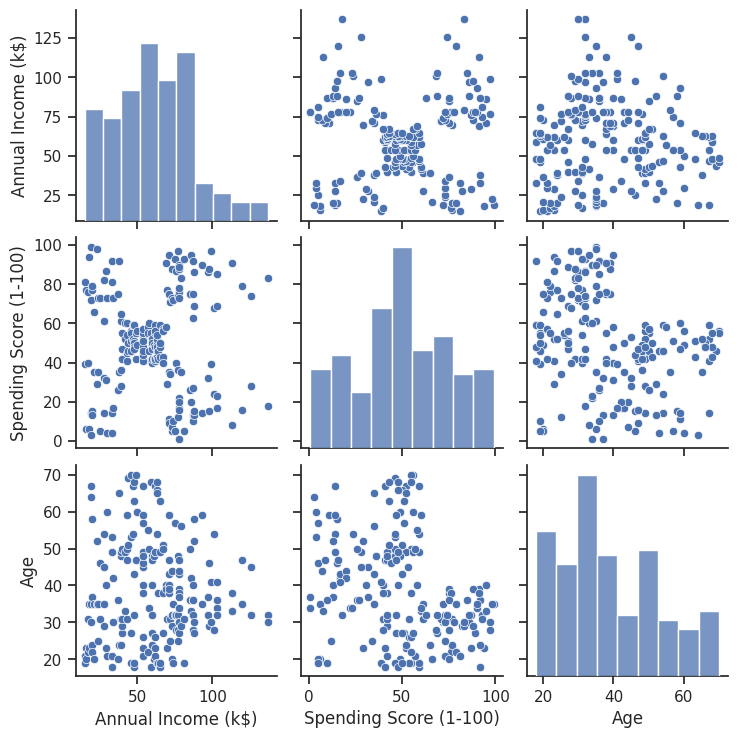

In [ ]:
sns.pairplot(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])
plt.show()

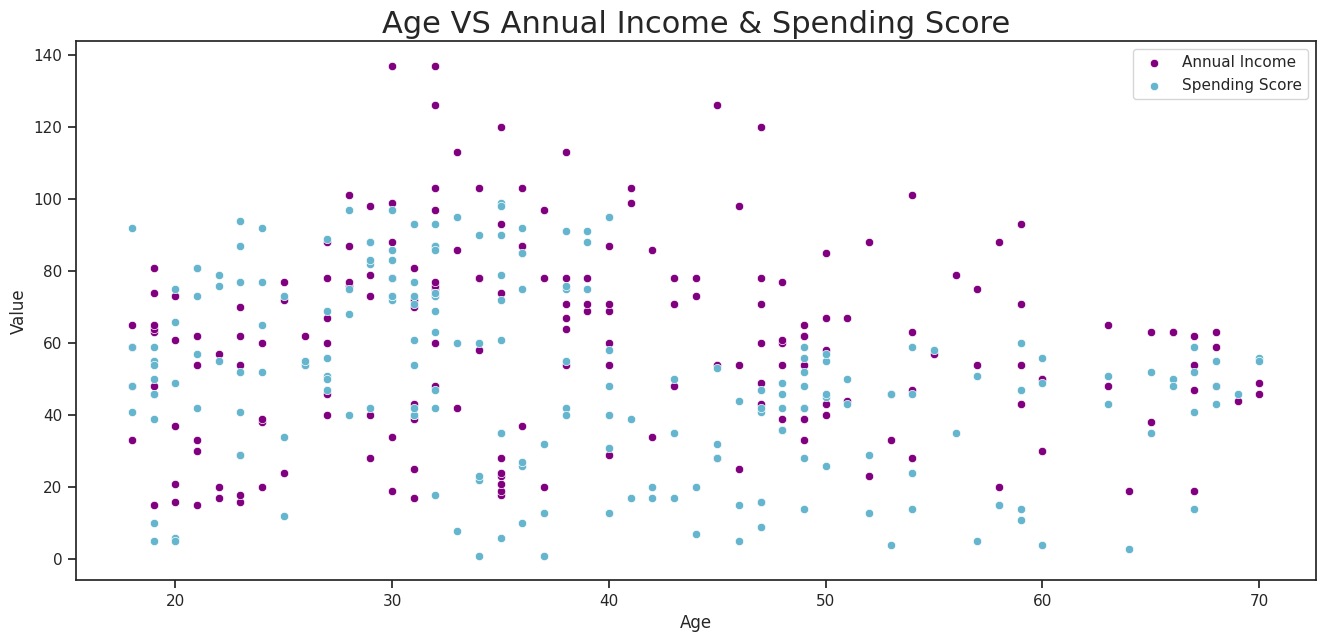

In [ ]:
plt.figure(figsize=(16, 7))

# Gráfico de dispersão para Age vs Annual Income
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, color='purple', label="Annual Income")
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, color='c', label="Spending Score")

plt.title("Age VS Annual Income & Spending Score", fontsize=22)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

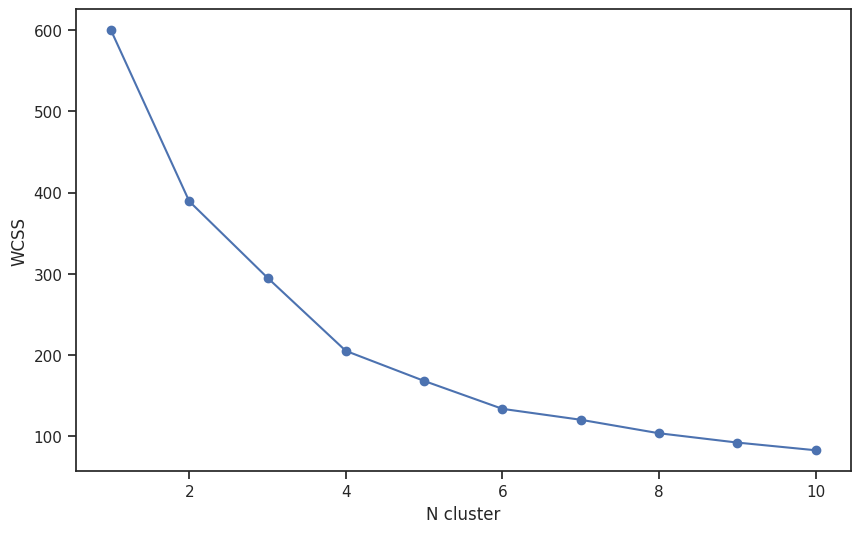

In [ ]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[columns]
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# elbow para testar o N. de clusters mais optimizado
#escolhi por ter uma visualizacao + facil
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker ='o')
plt.xlabel('N cluster')
plt.ylabel('WCSS')
plt.show()

#ponto do elbow: n_cluster = 4

In [ ]:
import plotly.express as px
# Aplicando K-means
K_model = KMeans(n_clusters=4, n_init=10, max_iter=300)
K_model.fit(X_scaled)

clusters = K_model.labels_

X_scaled_df = pd.DataFrame(X_scaled, columns=columns)

X_scaled_df['cluster'] = clusters

# gráfico 3D com Plotly
fig = px.scatter_3d(X_scaled_df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='cluster', opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()

-----
### Questão 4

Resposta texto:

Diante das analises feitas, conclui-se que:

- Homens tem uma Renda Anual um pouco maior que as Mulheres;
- Mulheres tem um Score de Gasto um pouco maior que os homens;
- Maioria das pessoas ganham entre 40k a 80k por Ano;
- Pessoas que Ganham Anualmente 20k a 40k e de 75k a 100k tem um Score de Gasto maior;
- Maioria do publico que frequenta o shopping tem entre 18 a 35 anos;
- O publico de 20 a 40 anos tem um Score de Gasto maior;

Ou seja, o publico alvo seria em torno de:
- Pessoas de 18 a 40 anos, preferencialmente mulheres, que ganham anualmente entre 20 a 40k ou entre 75k a 100k.

## Anexo 1.

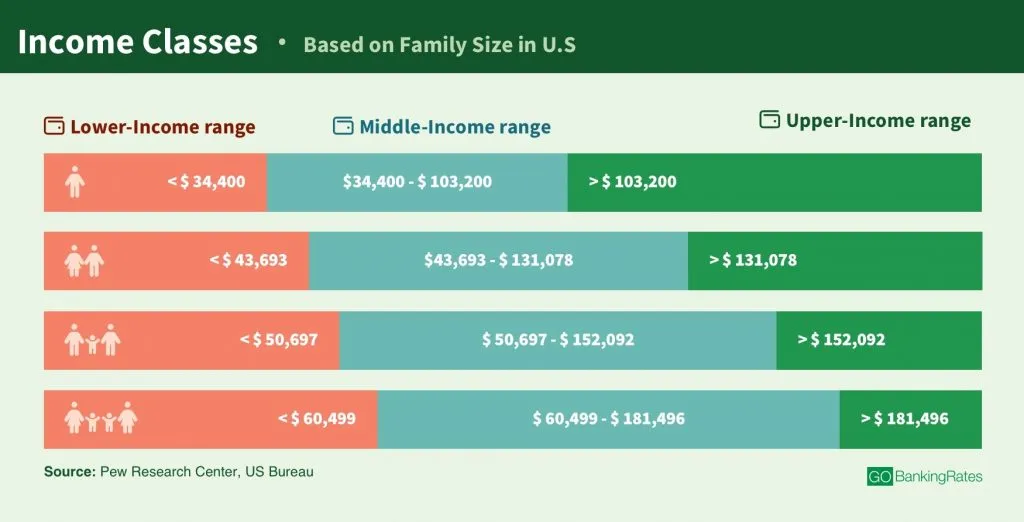